In [128]:
import torch
from torch import nn
import matplotlib.pyplot as plt

###  Trying for small subset

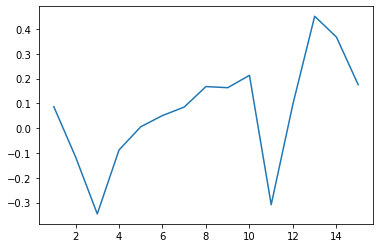

In [129]:
T =15
time = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.2, (T,))

plt.plot(time, x)
plt.grid = True
plt.show()

In [130]:
time

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15.])

In [131]:
torch.normal(0, 0.2, (T,)).shape

torch.Size([15])

In [132]:
torch.sin(0.01 * time).shape

torch.Size([15])

In [133]:
x

tensor([ 0.0869, -0.1152, -0.3455, -0.0877,  0.0058,  0.0512,  0.0854,  0.1680,
         0.1634,  0.2132, -0.3082,  0.0978,  0.4515,  0.3676,  0.1758])

In [134]:
tau = 4
features = torch.zeros((T-tau, tau))

In [135]:
features.shape, features

(torch.Size([11, 4]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [136]:
for i in range(tau):
    features[:, i] = x[i:T- tau+ i]
    print("iteration :", i, " :\n", features)
    
    # its a strange way to build up the features


iteration : 0  :
 tensor([[ 0.0869,  0.0000,  0.0000,  0.0000],
        [-0.1152,  0.0000,  0.0000,  0.0000],
        [-0.3455,  0.0000,  0.0000,  0.0000],
        [-0.0877,  0.0000,  0.0000,  0.0000],
        [ 0.0058,  0.0000,  0.0000,  0.0000],
        [ 0.0512,  0.0000,  0.0000,  0.0000],
        [ 0.0854,  0.0000,  0.0000,  0.0000],
        [ 0.1680,  0.0000,  0.0000,  0.0000],
        [ 0.1634,  0.0000,  0.0000,  0.0000],
        [ 0.2132,  0.0000,  0.0000,  0.0000],
        [-0.3082,  0.0000,  0.0000,  0.0000]])
iteration : 1  :
 tensor([[ 0.0869, -0.1152,  0.0000,  0.0000],
        [-0.1152, -0.3455,  0.0000,  0.0000],
        [-0.3455, -0.0877,  0.0000,  0.0000],
        [-0.0877,  0.0058,  0.0000,  0.0000],
        [ 0.0058,  0.0512,  0.0000,  0.0000],
        [ 0.0512,  0.0854,  0.0000,  0.0000],
        [ 0.0854,  0.1680,  0.0000,  0.0000],
        [ 0.1680,  0.1634,  0.0000,  0.0000],
        [ 0.1634,  0.2132,  0.0000,  0.0000],
        [ 0.2132, -0.3082,  0.0000,  0.0000

In [137]:
labels = x[tau:].reshape((-1,1))

In [138]:
labels

tensor([[ 0.0058],
        [ 0.0512],
        [ 0.0854],
        [ 0.1680],
        [ 0.1634],
        [ 0.2132],
        [-0.3082],
        [ 0.0978],
        [ 0.4515],
        [ 0.3676],
        [ 0.1758]])

In [139]:
torch.zeros((T-tau, tau)).shape

torch.Size([11, 4])

In [140]:
x[1:T-4+1].shape

torch.Size([11])

### Okay,
so what we are essentially doing is in a series we are trying to select a particular numbe rof values (tau) and then the next number is put as the label

### Training more data
for real

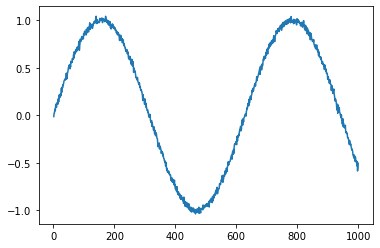

In [141]:
# generating data
T = 1000
t = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * t) + torch.normal(0,0.02, (T,))
plt.plot(t,x)
plt.show()

In [142]:
#x.sum()
#x

In [143]:
# making features and labels
tau=4
features = torch.zeros(T-tau, tau)

In [144]:
labels = torch.zeros(len(x)-tau)
labels.shape
    

torch.Size([996])

### Lets try a different way of generating features and labels

In [145]:
for i in range(len(x)-tau):
    features[i,:] = x[i:i+tau]
    labels[i] = x[i+tau]

In [146]:
features.shape, labels.shape

(torch.Size([996, 4]), torch.Size([996]))

In [147]:
features[0:5], labels[0:5]

(tensor([[-0.0134,  0.0203,  0.0227,  0.0498],
         [ 0.0203,  0.0227,  0.0498,  0.0652],
         [ 0.0227,  0.0498,  0.0652,  0.0474],
         [ 0.0498,  0.0652,  0.0474,  0.0999],
         [ 0.0652,  0.0474,  0.0999,  0.1173]]),
 tensor([0.0652, 0.0474, 0.0999, 0.1173, 0.0933]))

In [148]:
labels = labels.reshape(-1,1)
labels[:5,:]

tensor([[0.0652],
        [0.0474],
        [0.0999],
        [0.1173],
        [0.0933]])

In [149]:
batch_size = 16
n_train = 600

train_dataset = torch.utils.data.TensorDataset(*(features[:n_train], labels[:n_train]))
train_iter = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

test_dataset = torch.utils.data.TensorDataset(*(features[n_train:], labels[n_train:]))
test_iter = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

In [150]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [151]:
def get_net():
    net = nn.Sequential(nn.Linear(4,10), nn.ReLU(), nn.Linear(10,1))
    net.apply(init_weights)
    return net

In [152]:
loss = nn.MSELoss()

In [153]:
def evaluate_loss(net, test_iter, loss):
    net.eval()
#     net = net.to(torch.device("cpu"))
    with torch.no_grad():
        l = 0
        numer = 0
        for X, y in test_iter:
            l += loss(net(X),y)
            numer += y.shape[0]
        return l/numer

In [154]:
def train(net, train_iter,test_iter, loss, epochs, lr):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     net = net.to(device)
    net.train()
    for epoch in range(epochs):
        for X, y in train_iter:
    #         X = X.to(device)
    #         y = y.to(device)
            y_hat = net(X)
            #print(y_hat.shape)
            optimizer.zero_grad()
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
        print(f"for epoch {epoch} : test loss: {evaluate_loss(net,train_iter,loss)} " )
        

In [155]:
net = get_net()
train(net, train_iter,test_iter, loss, 10, 0.01)

for epoch 0 : test loss: 0.0011242537293583155 
for epoch 1 : test loss: 0.00023580384731758386 
for epoch 2 : test loss: 0.00023041822714731097 
for epoch 3 : test loss: 0.00014000630471855402 
for epoch 4 : test loss: 0.0001118289801524952 
for epoch 5 : test loss: 8.14838640508242e-05 
for epoch 6 : test loss: 7.313583773793653e-05 
for epoch 7 : test loss: 6.99246083968319e-05 
for epoch 8 : test loss: 5.4939508117968217e-05 
for epoch 9 : test loss: 4.6468110667774454e-05 


In [164]:
# lets try predicting

pred_x = []
for X, y in test_iter:
    pred_x.append(net(X))

len(pred_x)

25

In [166]:
pred_x = net(features)

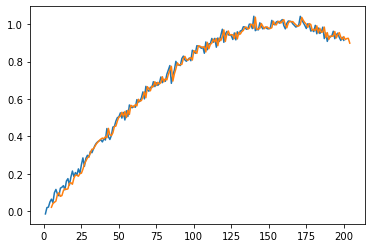

In [173]:
plt.plot(t[:10], x[:20])
plt.plot(t[tau:200+tau], pred_x[:200].detach().numpy())
plt.show()